# Overfitting vs Underfitting

## Polynomial Regression as an example

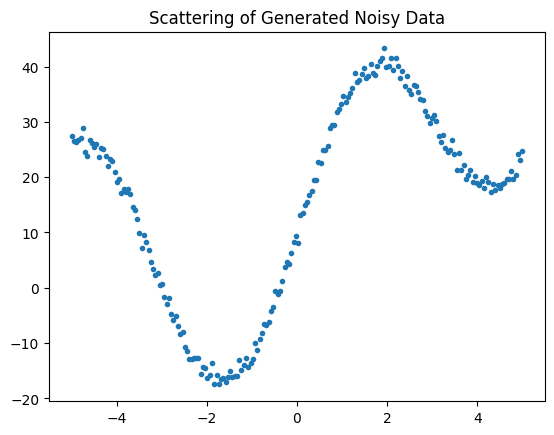

In [9]:
# Pkgs & Dataset
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
np.set_printoptions(precision=3)

np.random.seed(39)
X = np.linspace(-5, 5, 200)
y = 22 * np.sin(X) + 0.6 * X**2 + 4 * X + 10 + np.random.normal(0, 1, 200)

plt.plot(X, y, '.')
plt.title('Scattering of Generated Noisy Data')
plt.show()

MSE: 277.5672276930048
MSE: 262.2356747410002
MSE: 3.478911743137151
MSE: 1.1836897194911402
MSE: 1.2642710545899392
MSE: 1.264601525395635
MSE: 1.2569428973032775
MSE: 1.262962902335806
MSE: 1.295987481773349


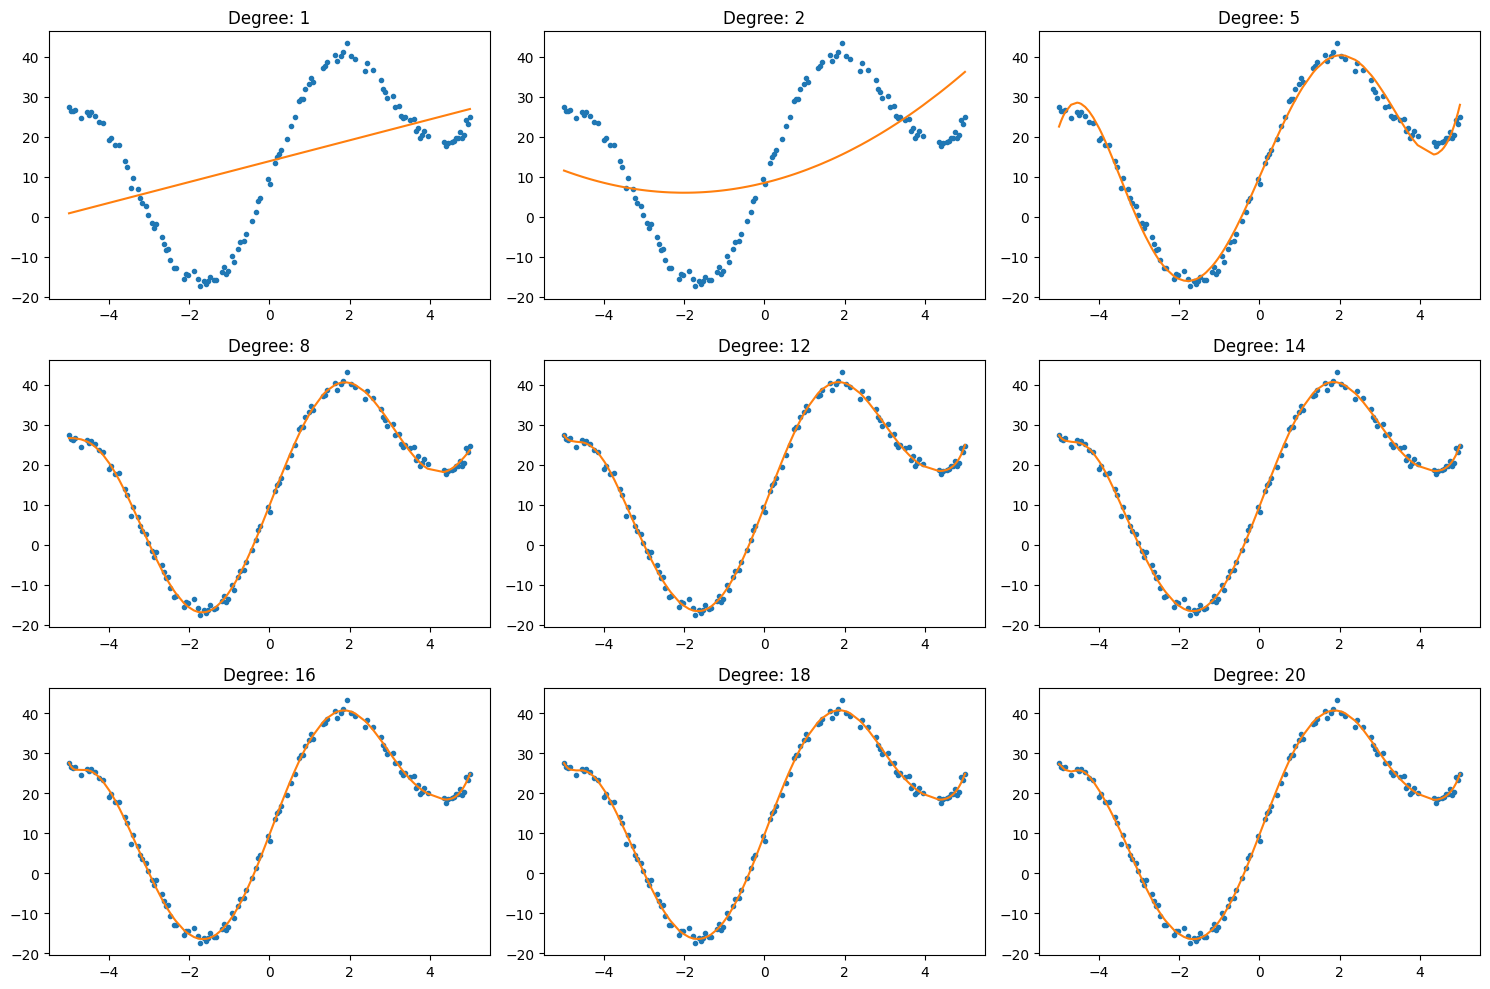

In [10]:
# Different degrees of polynomial regression

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.4, random_state=0)

# Define polynomial degrees to experiment with
degrees = [1, 2, 5, 8, 12, 14, 16, 18, 20]

train_MSEs = []
test_MSEs = []
train_RSSs = []
test_RSSs = []

plt.figure(figsize=(15, 10)) 

for i, degree in enumerate(degrees, 1):
    plt.subplot(3, 3, i)
    poly_features = PolynomialFeatures(degree=degree)
    lrg = LinearRegression()
    pipeline = Pipeline([("polynomial_features",poly_features),("linear_regression",lrg)])
    pipeline.fit(X_tr.reshape(-1,1), y_tr)
    pred_train = pipeline.predict(X_tr.reshape(-1,1))
    pred_test = pipeline.predict(X_te.reshape(-1,1))

    train_mse = mean_squared_error(y_tr,pred_train)
    train_MSEs.append(train_mse)
    test_mse = mean_squared_error(y_te,pred_test)
    test_MSEs.append(test_mse)
    train_rss = sum((y_tr - pred_train) ** 2)
    train_RSSs.append(train_rss)
    test_rss = sum((y_te - pred_test) ** 2)
    test_RSSs.append(test_rss)
    
    plt.plot(X_tr, y_tr, '.')
    plt.plot(np.sort(X_tr, axis=0), pred_train[np.argsort(X_tr, axis=0)])
    plt.title(f'Degree: {degree}')
    plt.tight_layout()
    
    print(f"MSE: {test_mse}")

plt.show()

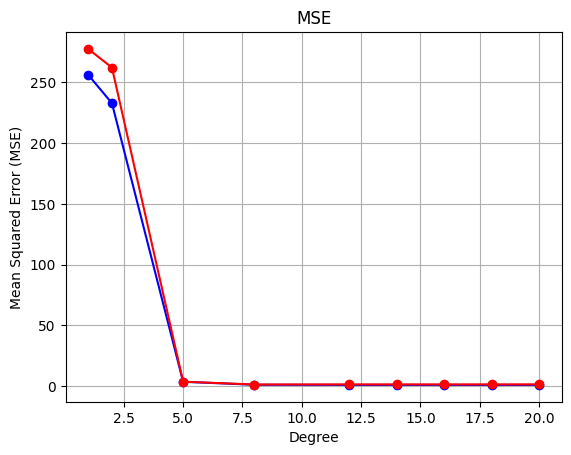

In [11]:
# MSE vs no.of degrees

plt.figure()

plt.plot(degrees,train_MSEs,marker='o', color ='b')
plt.plot(degrees,test_MSEs,marker='o', color = 'r')

plt.xlabel('Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE')

plt.grid(True)
plt.show()

##### In the example, Degree 8 is the best. Degree 8 has the lowest test MSE above all.